In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
import datetime as dt

<ipython-input-7-4c134f623c37>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
#### ==> col

# 1. **Unnamed: 0**: غالبًا ما يكون هذا العمود عبارة عن فهرس أو معرف مخصص للصفوف. يتم إنشاؤه تلقائيًا في بعض الأحيان عند قراءة البيانات من ملف.

# 2. **trans_date_trans_time**: تاريخ ووقت المعاملة المالية. يكون عادةً في صيغة نصية (object) ويحتوي على معلومات دقيقة حول متى تمت المعاملة.

# 3. **cc_num**: رقم بطاقة الائتمان المستخدمة في المعاملة. هذا العمود مهم لمتابعة المعاملات لكن يجب مراعاة الخصوصية.

# 4. **merchant**: اسم التاجر أو المتجر الذي تمت فيه المعاملة.

# 5. **category**: فئة المعاملة، مثل الطعام، الملابس، السفر، وغيرها. يمكن أن يساعد هذا في تحليل أنماط الإنفاق.

# 6. **amt**: المبلغ المالي للمعاملة. يمثل قيمة المعاملة، ويكون نوعه عددًا عشريًا (float64).

# 7. **first**: الاسم الأول للشخص الذي قام بالمعاملة.

# 8. **last**: الاسم الأخير للشخص الذي قام بالمعاملة.

# 9. **gender**: جنس الشخص (ذكر أو أنثى).

# 10. **street**: عنوان الشارع للمستخدم.

# 11. **city**: المدينة التي تمت فيها المعاملة. يحتوي على قيمة مفقودة واحدة.

# 12. **state**: الولاية التي تمت فيها المعاملة. يحتوي على قيمة مفقودة واحدة.

# 13. **zip**: الرمز البريدي، ويمثل منطقة معينة. يحتوي أيضًا على قيم مفقودة.

# 14. **lat**: خطوط العرض، تمثل الموقع الجغرافي للتاجر أو المعاملة.

# 15. **long**: خطوط الطول، تمثل الموقع الجغرافي للتاجر أو المعاملة.

# 16. **city_pop**: عدد سكان المدينة، يمكن استخدامه لتحليل تأثير الكثافة السكانية على الأنشطة المالية.

# 17. **job**: وظيفة الشخص الذي قام بالمعاملة. يمكن أن يساعد في دراسة العلاقة بين المهنة والإنفاق.

# 18. **dob**: تاريخ ميلاد الشخص، يمكن استخدامه لتحليل الفئات العمرية.

# 19. **trans_num**: رقم المعاملة الفريد، يساعد في تمييز كل معاملة عن الأخرى.

# 20. **unix_time**: الوقت بالتوقيت العالمي (Unix time) للمعاملة، مفيد للمعالجة الزمنية للبيانات.

# 21. **merch_lat**: خطوط العرض لموقع التاجر.

# 22. **merch_long**: خطوط الطول لموقع التاجر.

# 23. **is_fraud**: مؤشر على ما إذا كانت المعاملة احتيالية (1) أم لا (0). يعد هذا العمود مهمًا لتحليل عمليات الاحتيال.

# 24. **merch_zipcode**: الرمز البريدي لموقع التاجر، يحتوي على عدد من القيم المفقودة.
# !

In [ ]:
data = pd.read_csv('credit_card_transactions.csv')
df  = data.copy()
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,22844.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42480 entries, 0 to 42479
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42480 non-null  int64  
 1   trans_date_trans_time  42480 non-null  object 
 2   cc_num                 42480 non-null  int64  
 3   merchant               42480 non-null  object 
 4   category               42480 non-null  object 
 5   amt                    42480 non-null  float64
 6   first                  42480 non-null  object 
 7   last                   42480 non-null  object 
 8   gender                 42480 non-null  object 
 9   street                 42480 non-null  object 
 10  city                   42479 non-null  object 
 11  state                  42479 non-null  object 
 12  zip                    42479 non-null  float64
 13  lat                    42479 non-null  float64
 14  long                   42479 non-null  float64
 15  ci

In [ ]:
str_col = df.columns[df.dtypes =="object"]
for i in str_col:
    print('columns_name:', i ,'==>',df[i].unique() ,'==>',df[i].nunique())

columns_name: trans_date_trans_time ==> ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2019-01-26 09:31:47' '2019-01-26 09:32:04' '2019-01-26 09:38:59'] ==> 41994
columns_name: merchant ==> ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, 

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
import pandas as pd

# تحميل البيانات
data = pd.read_csv('credit_card_transactions.csv')

# عرض معلومات عن البيانات
print(data.info())

# ملء القيم المفقودة
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['street'].fillna(data['street'].mode()[0], inplace=True)
data['city'].fillna(data['city'].mode()[0], inplace=True)
data['state'].fillna(data['state'].mode()[0], inplace=True)
data['zip'].fillna(data['zip'].mean(), inplace=True)
data['lat'].fillna(data['lat'].mean(), inplace=True)
data['long'].fillna(data['long'].mean(), inplace=True)
data['city_pop'].fillna(data['city_pop'].mean(), inplace=True)
data['job'].fillna(data['job'].mode()[0], inplace=True)
data['dob'].fillna(data['dob'].mode()[0], inplace=True)
data['trans_num'].fillna(data['trans_num'].mode()[0], inplace=True)
data['unix_time'].fillna(data['unix_time'].mean(), inplace=True)
data['merch_lat'].fillna(data['merch_lat'].mean(), inplace=True)
data['merch_long'].fillna(data['merch_long'].mean(), inplace=True)
data['is_fraud'].fillna(data['is_fraud'].mode()[0], inplace=True)

# ملء القيم المفقودة في merch_zipcode
# يمكن استخدام القيم الأكثر شيوعًا أو المتوسط أو أي قيمة معقولة بناءً على السياق
data['merch_zipcode'].fillna(data['merch_zipcode'].mode()[0], inplace=True)

# عرض القيم المملوءة
print(data.isnull().sum())  # تحقق من القيم المفقودة بعد الملء


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045073 entries, 0 to 1045072
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1045073 non-null  int64  
 1   trans_date_trans_time  1045073 non-null  object 
 2   cc_num                 1045073 non-null  int64  
 3   merchant               1045073 non-null  object 
 4   category               1045073 non-null  object 
 5   amt                    1045073 non-null  float64
 6   first                  1045073 non-null  object 
 7   last                   1045073 non-null  object 
 8   gender                 1045073 non-null  object 
 9   street                 1045073 non-null  object 
 10  city                   1045073 non-null  object 
 11  state                  1045073 non-null  object 
 12  zip                    1045073 non-null  int64  
 13  lat                    1045073 non-null  float64
 14  long              

<ipython-input-20-cc5bea85bbff>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna(data['gender'].mode()[0], inplace=True)
<ipython-input-20-cc5bea85bbff>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
merch_zipcode            0
dtype: int64


In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,42480.000000,4.248000e+04,42480.000000,42479.000000,42479.000000,42479.000000,4.247900e+04,4.247900e+04,42479.000000,42479.000000,42479.000000,36048.000000
mean,21239.500000,4.172293e+17,71.522028,48733.899032,38.534377,-90.244248,8.868532e+04,1.326460e+09,38.534179,-90.248181,0.009346,46659.068492
std,12263.064054,1.309406e+18,149.490883,27008.405237,5.090830,13.944224,2.982800e+05,6.198593e+05,5.120635,13.958920,0.096222,25932.480642
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000,1002.000000
25%,10619.750000,1.800429e+14,9.690000,25832.000000,34.668900,-96.809400,7.430000e+02,1.325938e+09,34.784058,-96.942631,0.000000,24650.500000
50%,21239.500000,3.519233e+15,47.960000,48088.000000,39.342600,-87.456900,2.456000e+03,1.326482e+09,39.345416,-87.362625,0.000000,45686.000000
75%,31859.250000,4.642255e+15,83.610000,72042.000000,41.846700,-80.128400,2.047800e+04,1.327030e+09,41.922809,-80.176499,0.000000,68041.000000
max,42479.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.327570e+09,66.659242,-66.967742,1.000000,99403.000000


In [ ]:
df.describe(include='object')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,42480,42480,42480,42480,42480,42480,42480,42479,42479,42479,42479,42479
unique,41994,693,14,337,465,2,911,837,50,475,896,42479
top,2019-01-15 06:58:17,fraud_Cormier LLC,gas_transport,Christopher,Smith,F,72269 Elizabeth Field Apt. 132,Phoenix,TX,Exhibition designer,1977-03-23,0b242abb623afc578575680df30655b9
freq,3,141,4258,921,895,23183,129,186,3070,305,168,1


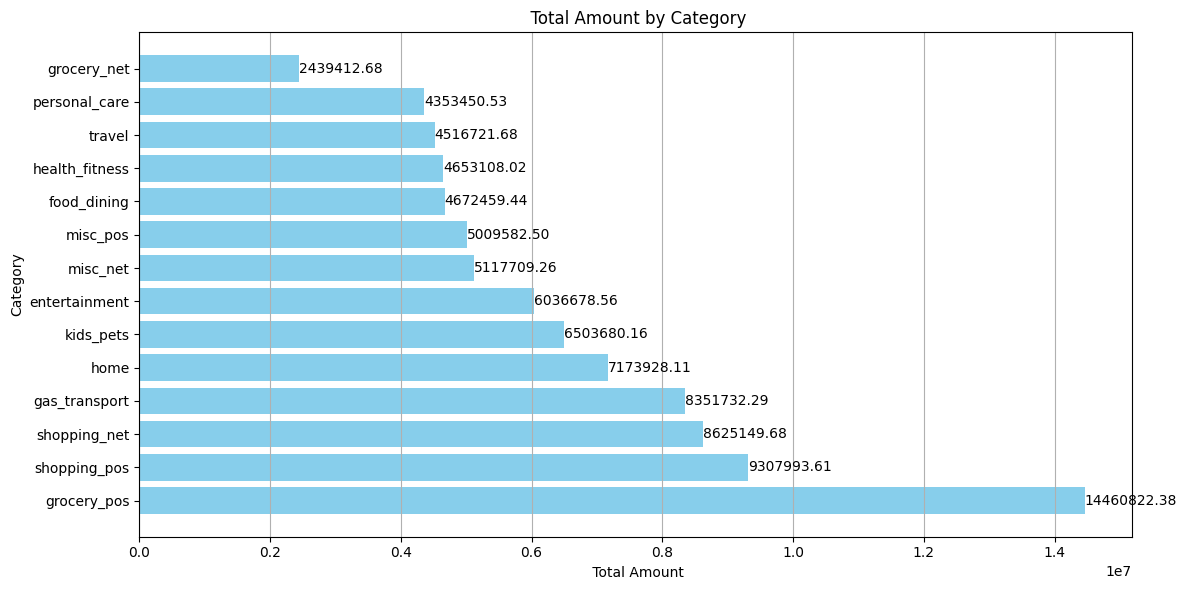

          category  total_amount
4      grocery_pos   14460822.38
12    shopping_pos    9307993.61
11    shopping_net    8625149.68
2    gas_transport    8351732.29
6             home    7173928.11
7        kids_pets    6503680.16
0    entertainment    6036678.56
8         misc_net    5117709.26
9         misc_pos    5009582.50
1      food_dining    4672459.44
5   health_fitness    4653108.02
13          travel    4516721.68
10   personal_care    4353450.53
3      grocery_net    2439412.68


In [ ]:
# يوضح توزيع المبالغ المالية حسب الفئات المختلفة. يساعدك هذا التحليل في فهم كيف يتم إنفاق الأموال عبر فئات مختلفة.

# تجميع البيانات حسب الفئة
category_summary = data.groupby('category').agg({'amt': 'sum'}).reset_index()

# إعادة تسمية الأعمدة
category_summary.columns = ['category', 'total_amount']

# ترتيب الفئات حسب المبلغ الإجمالي
category_summary = category_summary.sort_values(by='total_amount', ascending=False)

# رسم البيانات
plt.figure(figsize=(12, 6))
plt.barh(category_summary['category'], category_summary['total_amount'], color='skyblue')
plt.title('  Total Amount by Category ')
plt.xlabel(' Total Amount')
plt.ylabel('Category')
plt.grid(axis='x')

# إضافة قيم إلى الأعمدة
for index, value in enumerate(category_summary['total_amount']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

# عرض ملخص البيانات
print(category_summary)


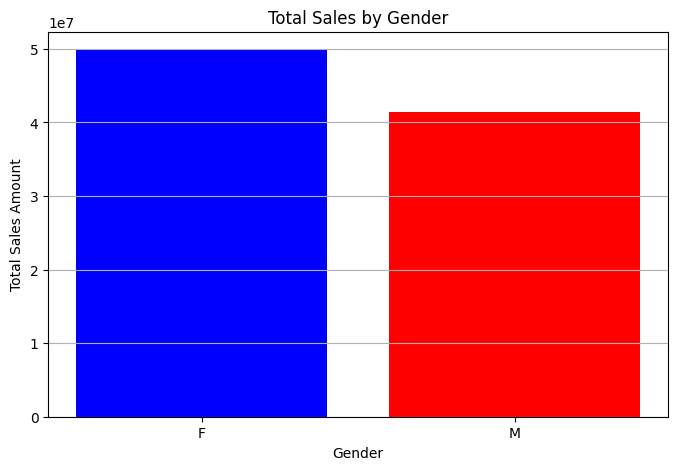

In [ ]:

# تجميع المبيعات حسب الجنس
sales_by_gender = data.groupby('gender')['amt'].sum().reset_index()

# إعداد الرسم
plt.figure(figsize=(8, 5))
plt.bar(sales_by_gender['gender'], sales_by_gender['amt'], color=['blue', 'r'])

# إعداد العنوان والتسميات
plt.title('Total Sales by Gender')  # عنوان الرسم
plt.xlabel('Gender')  # عنوان المحور السيني
plt.ylabel('Total Sales Amount')  # عنوان المحور الصادي

plt.grid(axis='y')
plt.show()


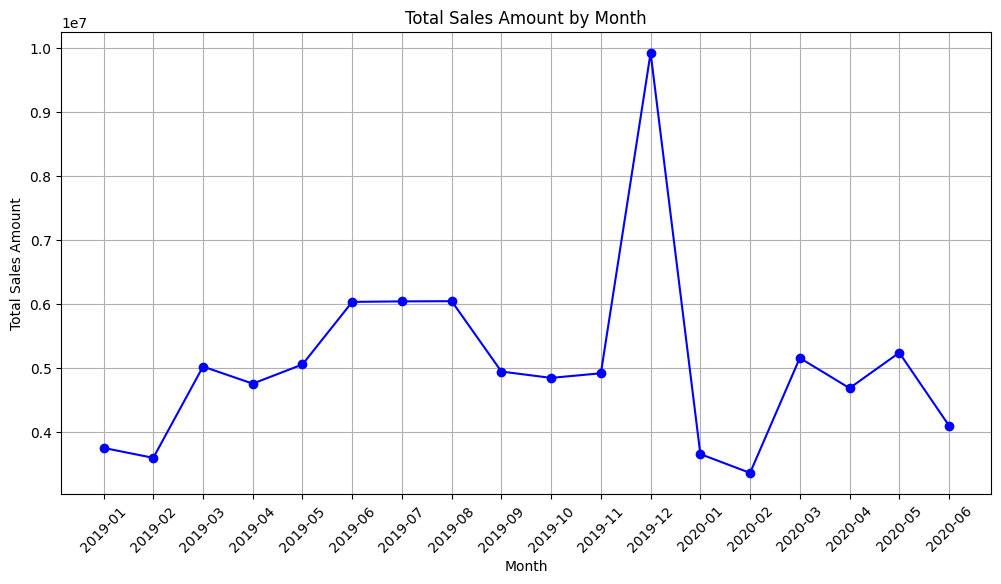

In [ ]:


# تحويل عمود التاريخ والوقت إلى نوع datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# استخراج الشهر من التاريخ
data['month'] = data['trans_date_trans_time'].dt.to_period('M')

# تجميع المبيعات حسب الشهر
monthly_sales = data.groupby('month')['amt'].sum().reset_index()

# إعداد الرسم
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['amt'], marker='o', color='blue')

# إعداد العنوان والتسميات
plt.title('Total Sales Amount by Month')  # عنوان الرسم
plt.xlabel('Month')  # عنوان المحور السيني
plt.ylabel('Total Sales Amount')  # عنوان المحور الصادي
plt.xticks(rotation=45)  # تدوير عناوين الأشهر لجعلها مقروءة
plt.grid()

plt.show()


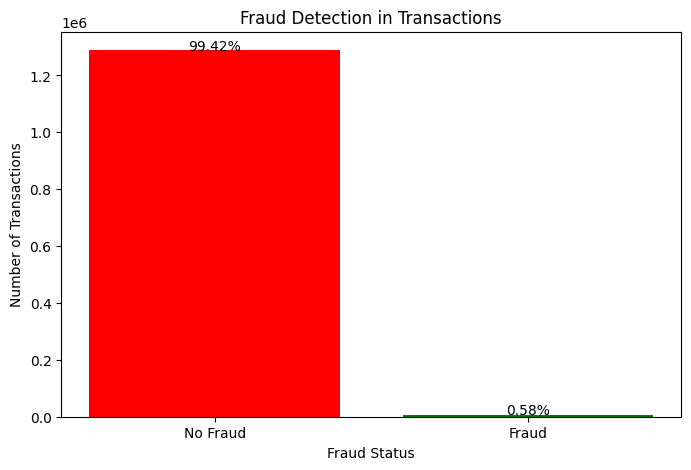

Percentage of Fraudulent Transactions: 0.58%


In [ ]:


# حساب نسبة الاحتيال
fraud_count = data['is_fraud'].value_counts()
fraud_percentage = (fraud_count[1] / len(data)) * 100

# إعداد الرسم البياني
plt.figure(figsize=(8, 5))
plt.bar(fraud_count.index, fraud_count.values, color=['red', 'green'])
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'])

# إعداد العنوان والتسميات
plt.title('Fraud Detection in Transactions')
plt.xlabel('Fraud Status')
plt.ylabel('Number of Transactions')

# إضافة النسبة المئوية
plt.text(0, fraud_count[0] + 500, f"{(fraud_count[0] / len(data)) * 100:.2f}%", ha='center')
plt.text(1, fraud_count[1] + 500, f"{(fraud_count[1] / len(data)) * 100:.2f}%", ha='center')

plt.show()

# طباعة نسبة الاحتيال
print(f'Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%')


## عدد المعاملات الاحتيالية مقابل عدد المعاملات العادية، بالإضافة إلى النسبة المئوية لكل منهما. سيساعدك هذا التحليل في فهم مدى انتشار الاحتيال في بياناتك.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


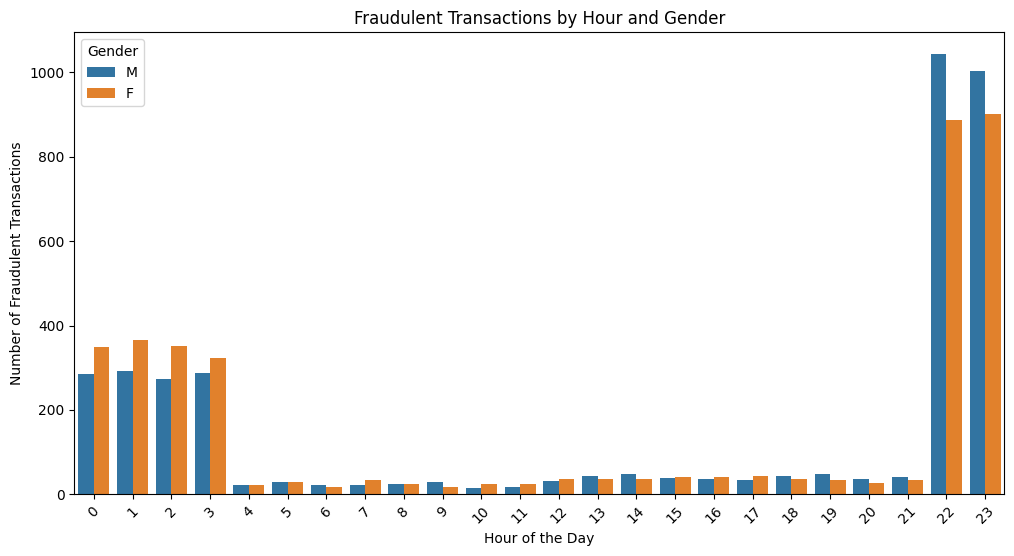

In [ ]:
## سيظهر الرسم البياني توزيع المعاملات الاحتيالية حسب الساعات خلال اليوم مع تمييز بين الجنسين. يمكنك استخدام هذا لتحليل الأوقات الأكثر شيوعًا للاحتياج حسب الجنس.

# تحويل عمود التاريخ إلى datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# استخراج الوقت من عمود التاريخ
data['transaction_time'] = data['trans_date_trans_time'].dt.hour

# تحليل وقت حدوث الاحتيال حسب الجنس
plt.figure(figsize=(12, 6))
sns.countplot(x='transaction_time', hue='gender', data=data[data['is_fraud'] == 1])
plt.title('Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend(title='Gender')
plt.xticks(range(24), rotation=45)
plt.show()


<ipython-input-43-94165f6b8125>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = data.groupby('age_group')['amt'].mean().reset_index()
<ipython-input-43-94165f6b8125>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='amt', data=gender_analysis, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:

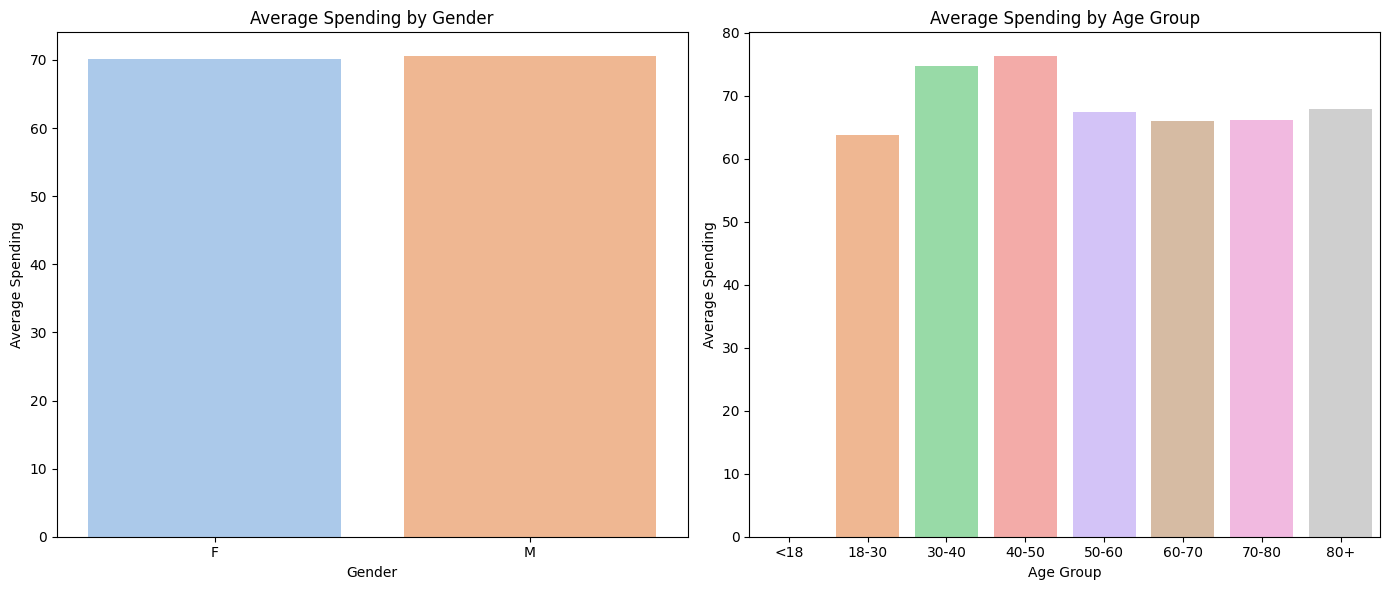

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('credit_card_transactions.csv')

# Convert date of birth to age
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (pd.to_datetime('today') - data['dob']).dt.days // 365

# Analyze demographic differences
# Average spending by gender
gender_analysis = data.groupby('gender')['amt'].mean().reset_index()

# Average spending by age group
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=labels)

age_analysis = data.groupby('age_group')['amt'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 6))

# Plot average spending by gender
plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='amt', data=gender_analysis, palette='pastel')
plt.title('Average Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending')

# Plot average spending by age group
plt.subplot(1, 2, 2)
sns.barplot(x='age_group', y='amt', data=age_analysis, palette='pastel')
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')

plt.tight_layout()
plt.show()
